In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical, plot_model

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)
filterwarnings('ignore')

In [2]:
# Fashion MNIST veri setini yükleme
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print("Eğitim seti boyutu :",X_train.shape,y_train.shape)
print("Test seti boyutu :",X_test.shape,y_test.shape)

Eğitim seti boyutu : (60000, 28, 28) (60000,)
Test seti boyutu : (10000, 28, 28) (10000,)


In [4]:
num_labels = len(np.unique(y_train))
num_labels
# 10 sınıf mevcut

10

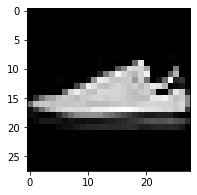

In [5]:
plt.figure(figsize=(3,3))
plt.imshow(X_train[6],cmap = "gray")

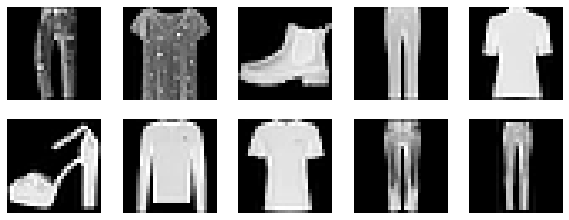

In [6]:
def gorsel_getir(data):
  plt.figure(figsize=(10,10))
  for n in range(10):
    idx = np.random.randint(len(X_train))
    ax = plt.subplot(5,5,n+1)
    plt.imshow(X_train[idx],cmap="gray")
    plt.axis('off')
gorsel_getir(X_train)

In [7]:
for classes in np.unique(y_train):
    print("Class : ",classes)

Class :  0
Class :  1
Class :  2
Class :  3
Class :  4
Class :  5
Class :  6
Class :  7
Class :  8
Class :  9


In [8]:
## 10 sınıf oldugunu belirtme
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [9]:
# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

In [10]:
# train/test olarak ayırma
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.3, random_state=42)

In [11]:
def egitim():
    model = Sequential()
    model.add(Dense(30, activation="relu", input_shape=(28*28,)))  # input_shape belirtiliyor
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="softmax"))
    
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val), callbacks=[early_stopping])

    return model, history

# Modeli eğitin
model, history = egitim()

Epoch 1/10
2625/2625 [==============================] - 3s 1ms/step - loss: 0.7943 - accuracy: 0.7198 - val_loss: 0.4758 - val_accuracy: 0.8350
Epoch 2/10
2625/2625 [==============================] - 3s 953us/step - loss: 0.6222 - accuracy: 0.7748 - val_loss: 0.4423 - val_accuracy: 0.8401
Epoch 3/10
2625/2625 [==============================] - 3s 961us/step - loss: 0.5930 - accuracy: 0.7805 - val_loss: 0.4283 - val_accuracy: 0.8469
Epoch 4/10
2625/2625 [==============================] - 3s 959us/step - loss: 0.5713 - accuracy: 0.7899 - val_loss: 0.4258 - val_accuracy: 0.8492
Epoch 5/10
2625/2625 [==============================] - 3s 959us/step - loss: 0.5569 - accuracy: 0.7941 - val_loss: 0.4124 - val_accuracy: 0.8556
Epoch 6/10
2625/2625 [==============================] - 3s 953us/step - loss: 0.5513 - accuracy: 0.7972 - val_loss: 0.4111 - val_accuracy: 0.8533
Epoch 7/10
2625/2625 [==============================] - 3s 999us/step - loss: 0.5382 - accuracy: 0.8016 - val_loss: 0.4150 - v

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                23550     
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [13]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

563/563 [==============================] - 0s 675us/step - loss: 0.4111 - accuracy: 0.8533
Test Loss: 0.41112083196640015
Test Accuracy: 0.8532778024673462


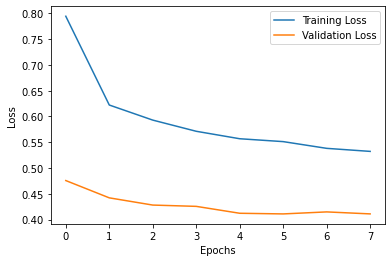

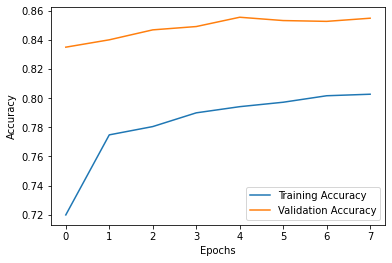

In [14]:
def grafik1():
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
grafik1()

#### Dropout ve earlystopping olmadan 
- ek olarak 1.katman 30 nörondan 10'a düşürdüm

In [15]:
model1 = Sequential()
model1.add(Dense(10, activation="relu", input_shape=(28*28,)))  # input_shape belirtiliyor
model1.add(Dense(10, activation="softmax"))
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val))


Epoch 1/10
2625/2625 [==============================] - 3s 977us/step - loss: 0.5571 - accuracy: 0.8074 - val_loss: 0.4657 - val_accuracy: 0.8363
Epoch 2/10
2625/2625 [==============================] - 3s 971us/step - loss: 0.4257 - accuracy: 0.8491 - val_loss: 0.4298 - val_accuracy: 0.8496
Epoch 3/10
2625/2625 [==============================] - 2s 918us/step - loss: 0.3977 - accuracy: 0.8589 - val_loss: 0.4461 - val_accuracy: 0.8417
Epoch 4/10
2625/2625 [==============================] - 2s 921us/step - loss: 0.3837 - accuracy: 0.8629 - val_loss: 0.4194 - val_accuracy: 0.8524
Epoch 5/10
2625/2625 [==============================] - 2s 926us/step - loss: 0.3720 - accuracy: 0.8665 - val_loss: 0.4218 - val_accuracy: 0.8534
Epoch 6/10
2625/2625 [==============================] - 2s 949us/step - loss: 0.3633 - accuracy: 0.8703 - val_loss: 0.4121 - val_accuracy: 0.8586
Epoch 7/10
2625/2625 [==============================] - 2s 937us/step - loss: 0.3551 - accuracy: 0.8718 - val_loss: 0.4246 -

In [16]:
loss, accuracy = model1.evaluate(X_val, y_val)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

563/563 [==============================] - 0s 632us/step - loss: 0.4206 - accuracy: 0.8559
Test Loss: 0.42059868574142456
Test Accuracy: 0.8559444546699524


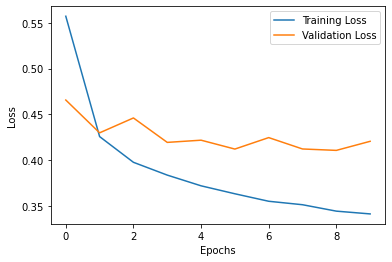

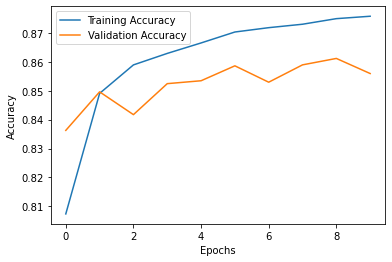

In [17]:
def grafik2():
    plt.plot(history1.history['loss'], label='Training Loss')
    plt.plot(history1.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


    plt.plot(history1.history['accuracy'], label='Training Accuracy')
    plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
grafik2()

grafik1 ve grafik2 değerlerine bakıldığında :
dropout kullanılan ve katmandaki nöron sayısının 30 olduğu model validation değerlerinde daha kararlı sonuçlara sahip.
grafik2'ye bakıldığında ise overfitting gözükmekte. Training doğruluk oranı %87'nin üzerine çıkarken, validation doğruluk oranı maksimum %86'ya çıkmış olup epoch sayısı arttıkça doğruluk düşmüştür. Bu da grafik2'de bulunan model1'in validation verileri üzerinde diğer model kadar iyi performans gösteremediğini açıklar.

In [18]:
import random
random = random.randint(0,X_val.shape[0])
random

1212

In [19]:
test_image = X_val[random]

In [20]:
y_val[random]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

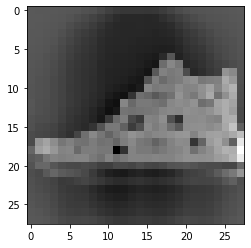

In [21]:
plt.imshow(test_image.reshape(28,28),cmap='gray')

In [22]:
test_data = X_val[random].reshape(1, 28*28)
pred = model.predict(test_data)
pred

1/1 [==============================] - 0s 47ms/step


array([[2.6811307e-12, 4.7919150e-21, 1.3321982e-17, 2.0343748e-11,
        1.1658773e-14, 2.8131732e-03, 3.3193375e-14, 8.9952207e-01,
        6.1133654e-10, 9.7664781e-02]], dtype=float32)

In [23]:
predicted_classes = np.argmax(pred)
print("Tahmin sınıfı : ",predicted_classes)
print("Gerçek sınıf :",y_val[random].argmax())

Tahmin sınıfı :  7
Gerçek sınıf : 7
